### 数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w, b = 1.8, 2.5

In [3]:
np.random.seed(0)
x1 = np.random.rand(100) * 4
noise = np.random.randn(100)
x2 = w * x1 + b + noise

In [4]:
x = np.vstack([x1, x2]).T
x -= np.mean(x, axis = 0)
x.shape

(100, 2)

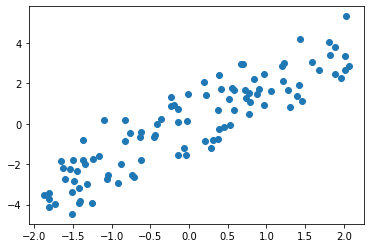

In [5]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

### PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=1)
pca.fit(x)

PCA(n_components=1)

In [8]:
x_pca = pca.transform(x)
x_pca_inv = pca.inverse_transform(x_pca)

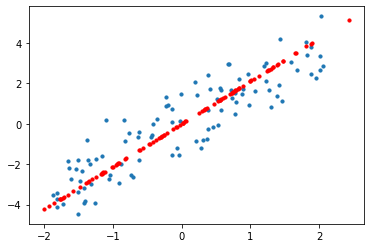

In [9]:
plt.scatter(x[:, 0], x[:, 1], s = 10)
plt.scatter(x_pca_inv[:, 0], x_pca_inv[:, 1], s = 10, c = 'r')
plt.show()

### 图像降噪

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
y = digits.target

In [11]:
x.shape, y.shape

((1797, 64), (1797,))

In [12]:
def plot_top20_digits(x):
    for i in range(20):
        plt.subplot(4, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.show()

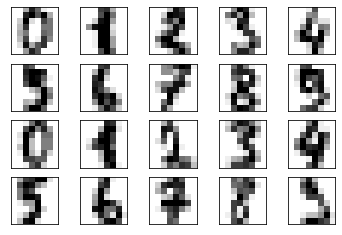

In [13]:
plot_top20_digits(x)

In [14]:
np.random.seed(0)
x_noise = x + np.random.randn(x.shape[0], x.shape[1]) * 3

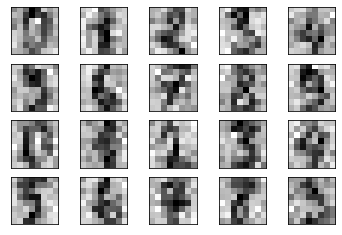

In [15]:
plot_top20_digits(x_noise)

In [16]:
pca = PCA(0.5)
pca.fit(x_noise)
x_noise_pca = pca.transform(x_noise)
x_noise_inv = pca.inverse_transform(x_noise_pca)

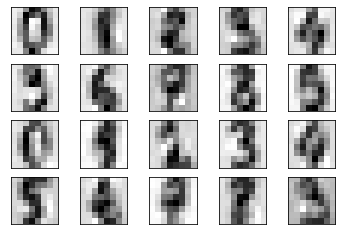

In [17]:
plot_top20_digits(x_noise_inv)